In [1]:
import pathlib
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import Collection

from HexLattice import *

In [2]:
MAX_ANISO_ORDER = 3
CORE_RING = 16
LATTICE_PITCH = 5.8877

lattice = HexLattice(ring=CORE_RING, pitch=2 * LATTICE_PITCH)
lattice.generate_lattice()

[[<HexLattice.hexLattice.HexCell at 0x280635c5160>],

In [3]:
lattice.lattice[0][0]['config'] = {
    'value': -1,
    'color': 'r'
}

In [4]:

assembly_type = - np.ones(shape=[CORE_RING, 6 * CORE_RING], dtype=int)

assembly_type[0, :1]  = [0]
assembly_type[1, :6]  = [1, 0, 1, 0, 1, 0]
assembly_type[2, :12] = [2, 0, 3, 1, 2, 0, 2, 0, 3, 0, 2, 1]
assembly_type[3, :18] = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2]
assembly_type[4, :24] = [5, 2, 1, 2, 5, 2, 4, 2, 5, 2, 5, 2, 5, 2, 4, 2, 6, 2, 5, 2, 4, 2, 5, 2]
assembly_type[5, :30] = [2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 4, 0, 2, 2, 2, 2, 2, 0, 4, 2]
assembly_type[6, :36] = [2, 2, 0, 7, 7, 7, 7, 7, 2, 2, 7, 7, 7, 7, 2, 2, 7, 7, 2, 7, 7, 2, 2, 7, 7, 7, 7, 2, 2, 7, 2, 7, 2, 7, 2, 7]

# dummy steel
assembly_type[7, :42] = 7 * np.ones(shape=[42], dtype=int)
assembly_type[8, :48] = 7 * np.ones(shape=[48], dtype=int)
assembly_type[9, :54] = 7 * np.ones(shape=[54], dtype=int)

# blanket
assembly_type[10, :60] = 8 * np.ones(shape=[60], dtype=int)
assembly_type[11, :66] = 8 * np.ones(shape=[66], dtype=int)

assembly_type[12, :72] = 8 * np.ones(shape=[72], dtype=int)
assembly_type[12, :72][[2, 12, 14, 22, 26, 35, 43, 50, 54, 62]] = 7

assembly_type[13, :78] = 8 * np.ones(shape=[78], dtype=int)
assembly_type[13, :78][[11, 15, 24, 28, 30, 35, 41, 52, 66, 76, 77]] = 7

assembly_type[14, :84] = 8 * np.ones(shape=[84], dtype=int)
assembly_type[14, :84][[0, 1, 14, 14, 15, 19, 27, 28, 29, 33, 41, 42, 43, 47, 55, 56, 57, 68, 69, 70, 71, 83]] = 9

assembly_type[15, :90] = 9 * np.ones(shape=[90], dtype=int)
assembly_type[15, :90][[6, 7, 8, 23, 37, 38, 52, 53, 66, 67, 69, 83]] = 8

assembly_type

array([[ 0, -1, -1, ..., -1, -1, -1],
       [ 1,  0,  1, ..., -1, -1, -1],
       [ 2,  0,  3, ..., -1, -1, -1],
       ...,
       [ 8,  8,  8, ..., -1, -1, -1],
       [ 9,  9,  8, ..., -1, -1, -1],
       [ 9,  9,  9, ..., -1, -1, -1]])

In [13]:
colors = {
    0: '#be0000', # dark orange (original dark red)
    1: '#808080', # grey (orignal dark blue)
    2: '#ff0000', # red
    3: '#ff00ff', # purple
    4: '#808000', # dark green
    5: '#00ff00', # green
    6: '#ffff00', # yellow
    7: '#0000ff', # blue
    8: '#00ffff', # cyan
    9: None       # transparent (left for black)
}

for i in range(assembly_type.shape[0]):
    for j in range(assembly_type.shape[1]):
        if assembly_type[i, j] == -1: continue
        lattice.lattice[i][j]['config'] = {
            'value' : None,
            'color' : colors[assembly_type[i, j]],
            'shape' : 'hex',
            'radius': 0., 
            'offset': (0, 0), 
            'zorder': 1, 
            'orientation': 90.
        }

Plotting core configuration ...


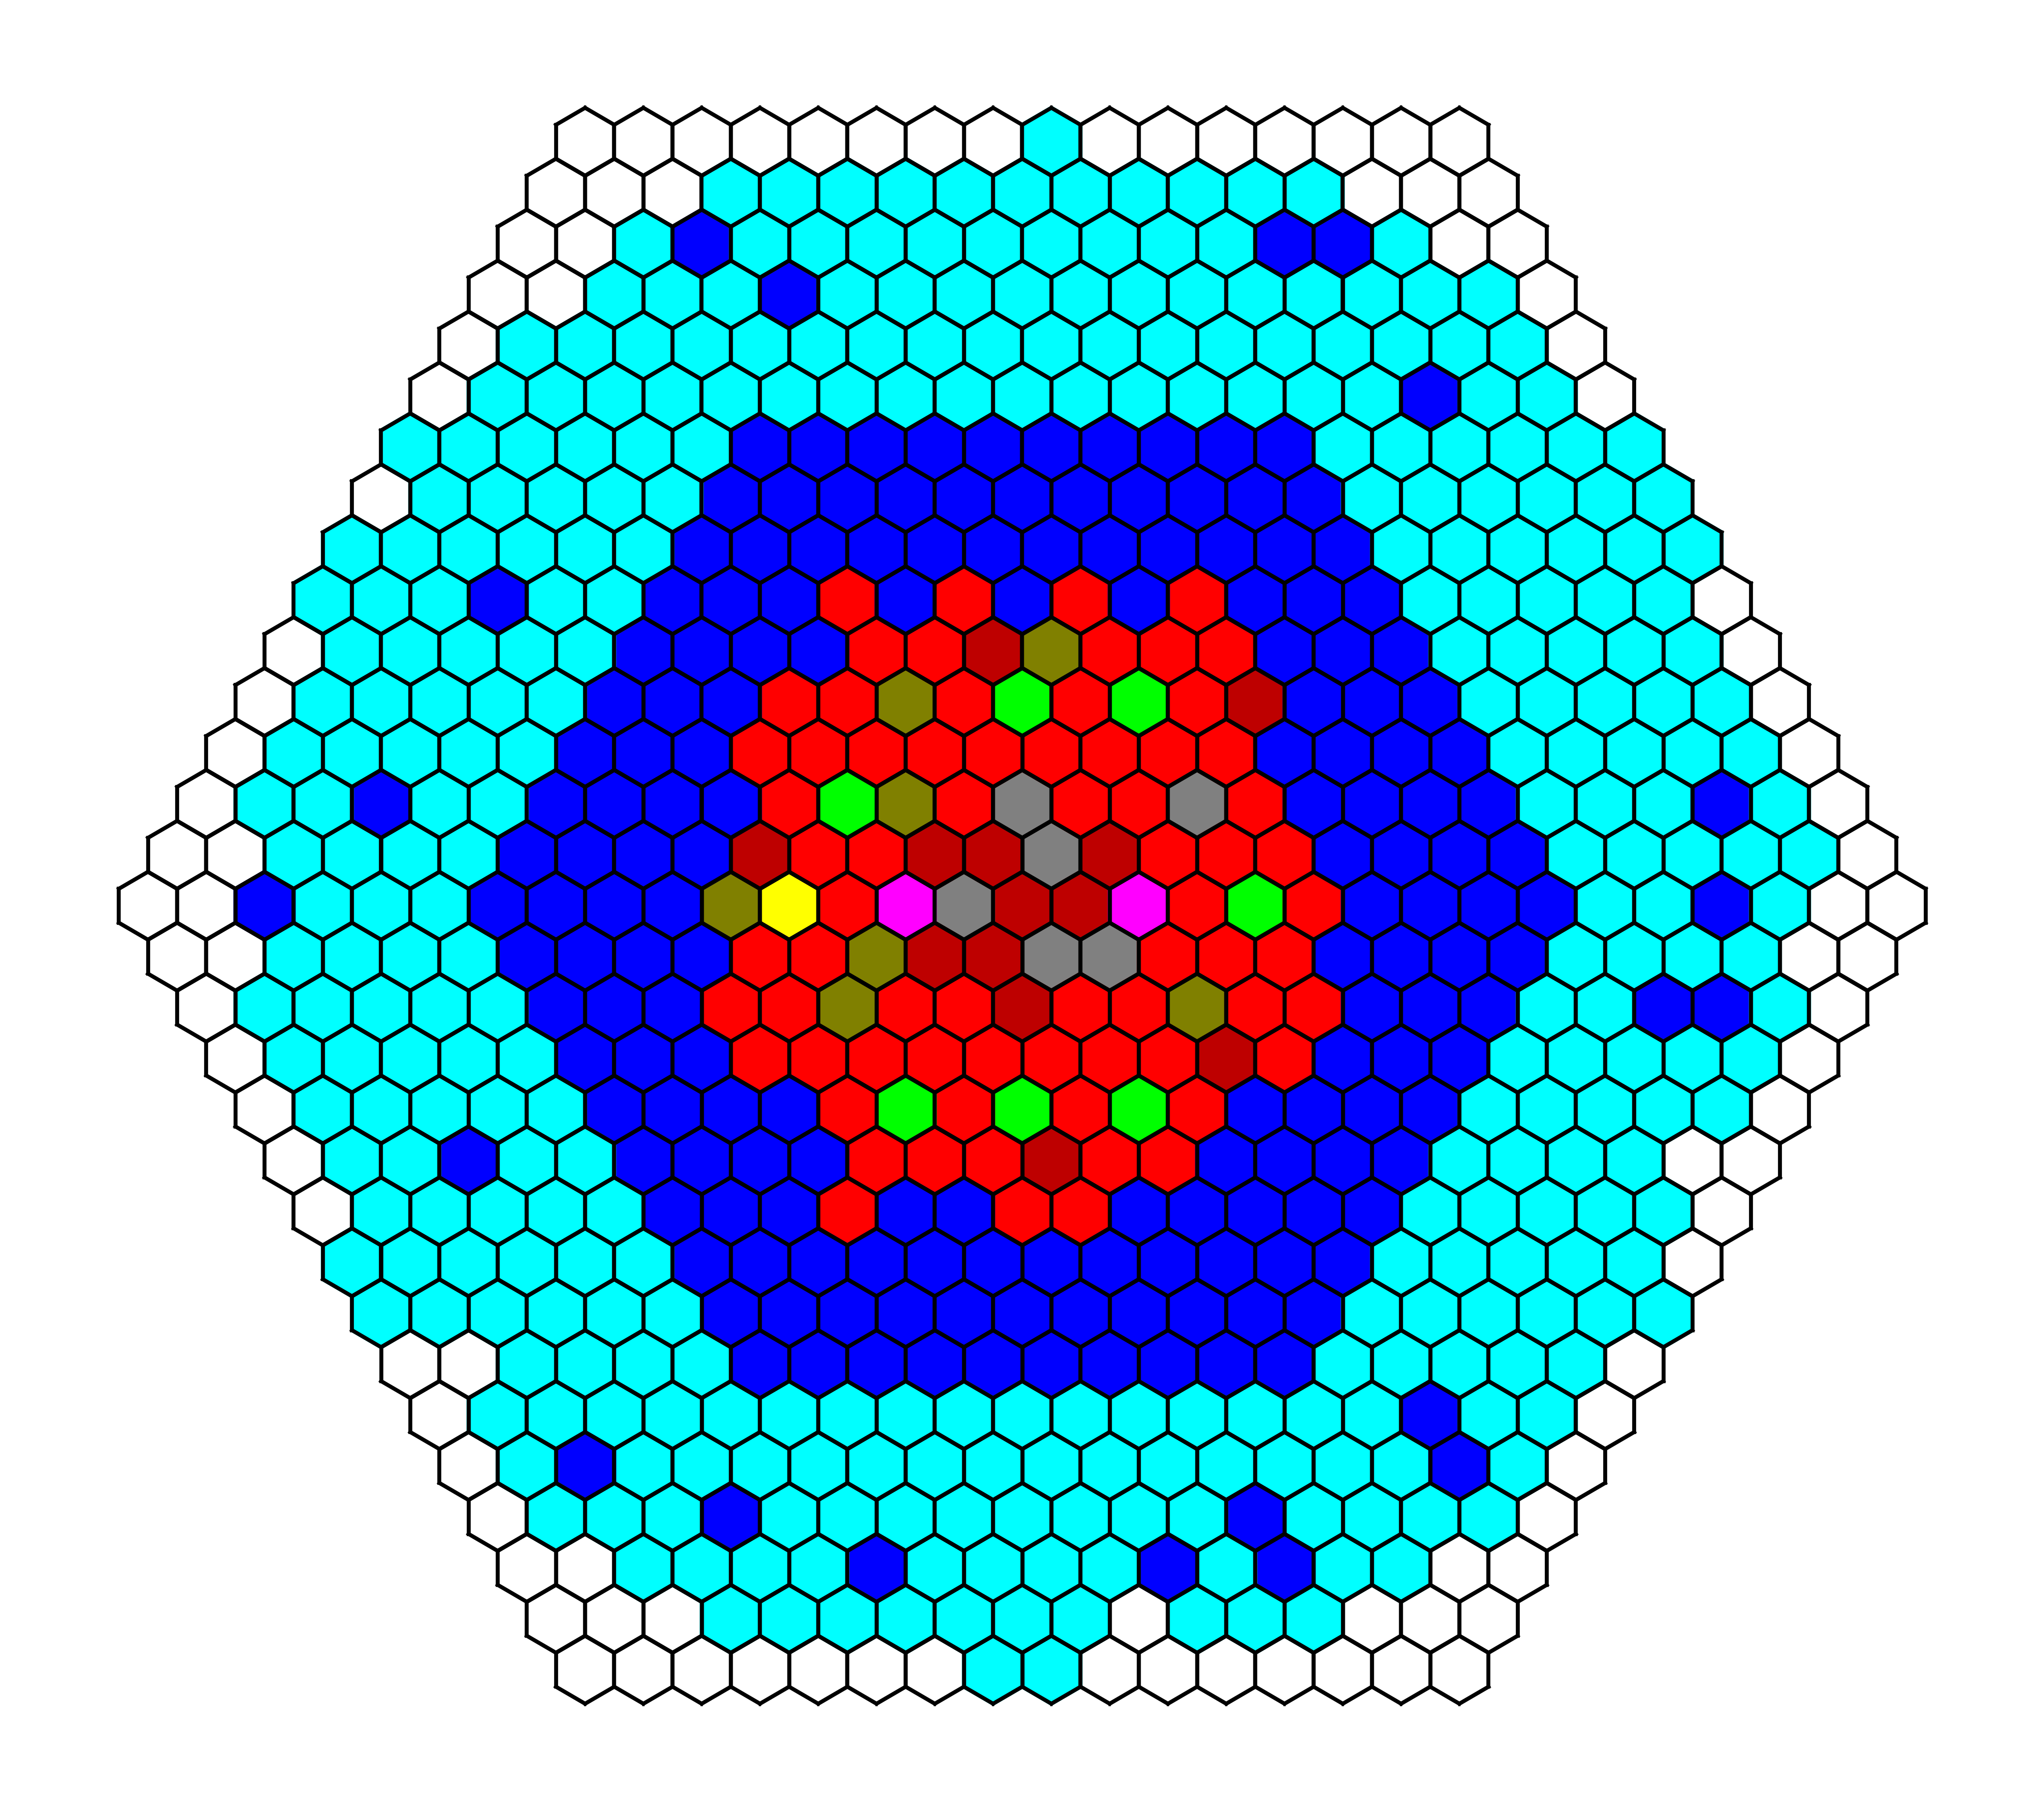

In [14]:
print(f"Plotting core configuration ...")
lattice.plot(
    keys = f'config',
    color_map = 'jet',
    # save_path = '--supress',
    save_path = pathlib.Path(os.getcwd()).parent.parent / f'gallery/ebr_core_config.svg',
    figsize = (9, 8),
    text_size = 8,
    dpi = 600,
    show_axis = False,
    show_colorbar = False
    # show_wireframe = False
)

# black_circle = Circle(xy=[0., 0.], radius=)

# plt.savefig(pathlib.Path(os.getcwd()).parent.parent / f'gallery/ebr_core_config.png')